In [1]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '/Users/daniel/Downloads/0116 시각화/diamonds.csv' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [4]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

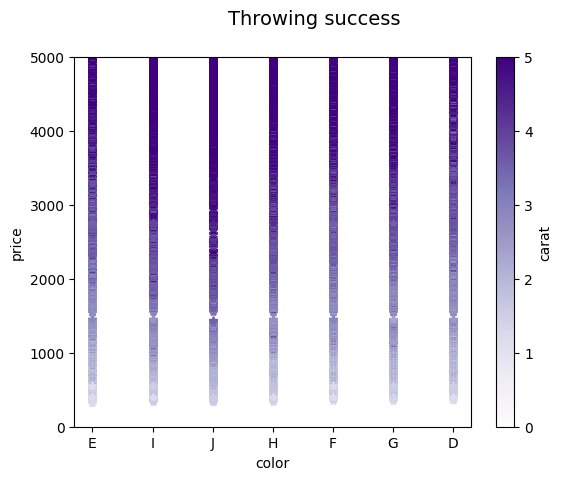

In [5]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [6]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

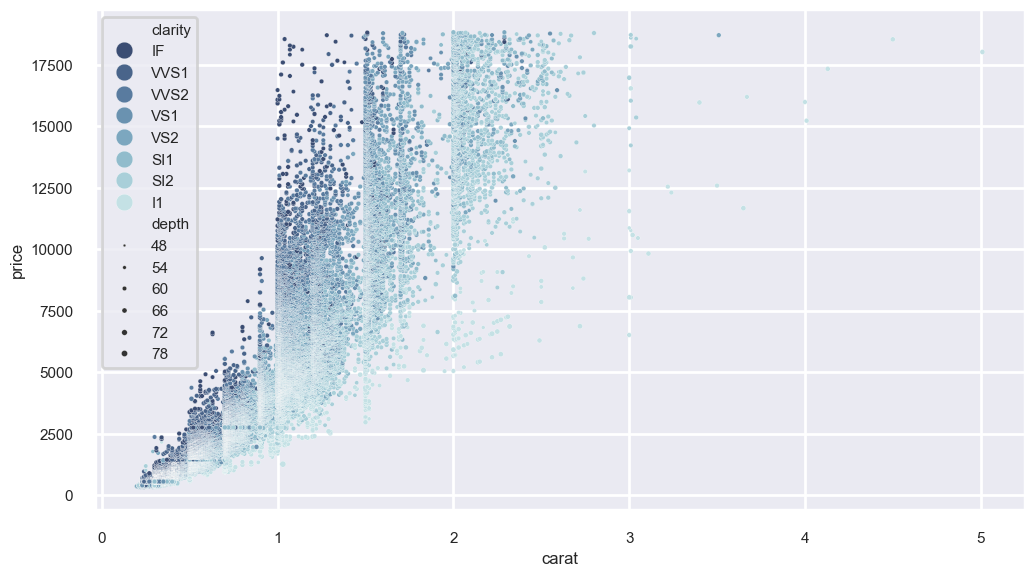

In [ ]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

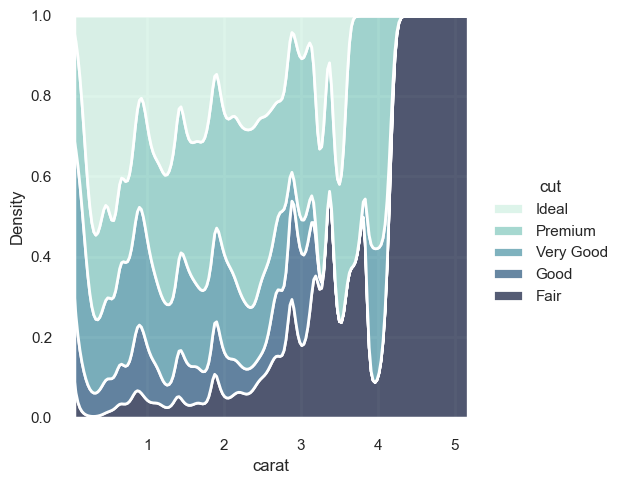

In [ ]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 여기에 답을 작성해주세요.
1번 - (1)
다이아몬드의 색, 캐럿, 가격간의 상관관계를 시각화하려고 한 것 같습니다. 
다만, 색의 변화가 눈에 띄지 않는다는 단점이 있어 색 별로 가격 변화에 대한 차이 등 알아보기가 어렵습니다. 
또한 가격 - 캐럿 - 색의 관계를 보려고 했다는 시각화의 목적을 생각했을 떄, 그래프 상에서 캐럿의 값과 가격이 주요한 상관관계가 있어보입니다. 
이는 색 - 가격 + 캐럿 보단, 가격 - 캐럿 + 색의 구조가 더 낫다는 것을 의미합니다. 

1번 - (2)
따라서 x축을 캐럿으로, y축을 가격으로 두고 각 그래프를 달리 해 다이아몬드의 color 변화에 따른 가격 - 캐럿 차이를 확인할 수 있게 합니다. 

2번 - (1)
같은 캐럿 대비 가격 분포를 clarity와 depth 군으로 분리해 시각화를 시도했습니다. 
clarity는 눈에 띄게 색의 변화가 보여 같은 캐럿 대비 높은 clarity를 가진 다이아몬드는 높은 가격을 가졌다는 것을 확인할 수 있습니다. 
다만 동시에 depth 분포를 확인하기 어렵습니다. 

2번 - (2)
따라서 clarity와 depth 분포를 각각 분리해 plotting합니다. 

3번 - (1)
다이아몬드의 KDE, 캐럿, cut의 관계를 파악하려고 한 것으로 보입니다. 
KDE 함수의 면적을 다 칠해버리면, 함수간 크기 비교가 어렵게 생기는 부분이 생깁니다. 
또한 각 carat마다 cut이 차지하는 비율을 표기했는데, cut마다 carat에 얼마나 많은 비율이 있는지 확인하기 어렵습니다. 

3번 - (2)
따라서 KDE 자체를 선으로 그린 그래프를 보조지표로 같이 할당해 확인할 수 있습니다. 

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 여기에 답을 작성해주세요.

# 2번 코드

In [7]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!

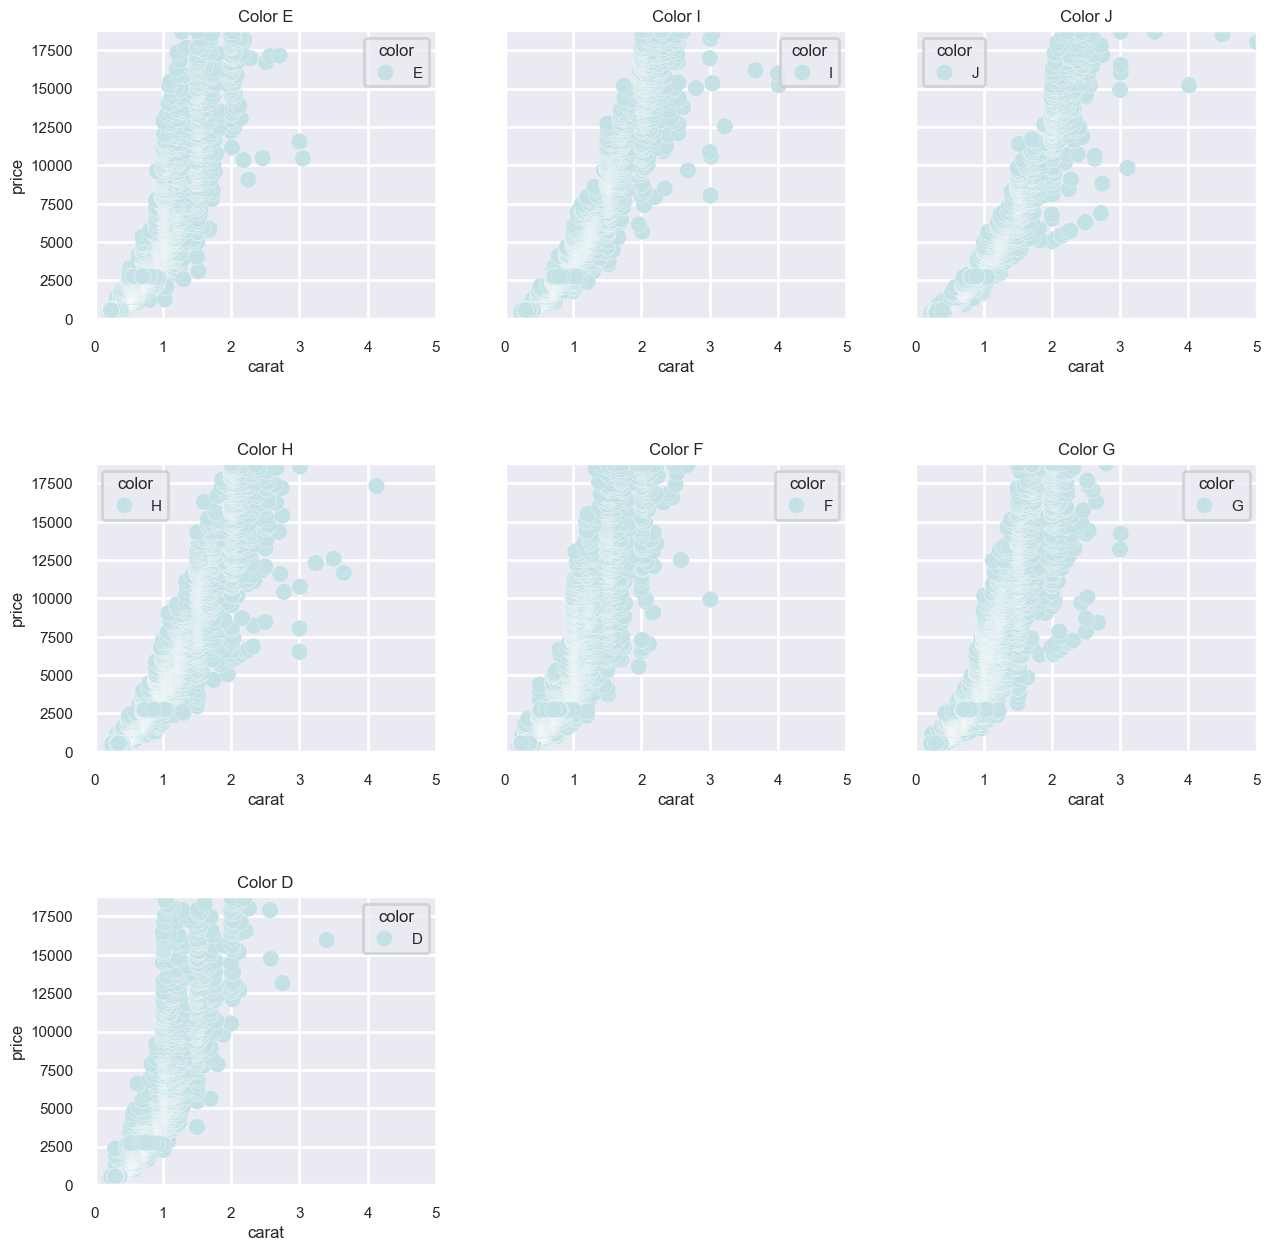

In [68]:
# 1번
# 색 별로 캐럿 - 가격의 변화가 눈에 띄게 보이지 않았기 때문에, 이를 더 자세히 볼 수 있는 시각화를 진행했습니다. 
# 7개의 플롯(색별로)을 그리기 위해 3행 3열의 서브플롯을 생성했고, scatterplot을 사용해 시각화 했습니다. 
# 각 서브플롯에 대해 반복적으로 그래프를 그리기 위해 for문을 사용했습니다.
# 각 서브플롯에는 해당 색상의 데이터만 사용하기 위해 df[df['color'] == color]를 사용했습니다.

import seaborn as sns
import matplotlib.pyplot as plt
color_ranking = ['E', 'I', 'J', 'H', 'F', 'G', 'D']

# 3행 3열의 서브플롯 생성
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True, squeeze=False, gridspec_kw={"width_ratios": [1, 1, 1]})

# 각 서브플롯에 대해 반복적으로 그래프 그리기
for i, color in enumerate(color_ranking):
    sns.scatterplot(x="carat",
                    y="price",
                    hue="color",
                    palette="ch:r=-.2,d=.3_r",
                    sizes=(1, 20),
                    linewidth=0.2,
                    data=df[df['color'] == color],  # 해당 색상의 데이터만 사용
                    ax=axes[i // 3, i % 3])
    
    axes[i // 3, i % 3].set_title(f'Color {color}')
    axes[i // 3, i % 3].set_xlim(0, df['carat'].max())  # x축 범위 설정
    axes[i // 3, i % 3].set_ylim(0, df['price'].max())  # y축 범위 설정

# 그래프 간 간격 조절
plt.subplots_adjust(hspace=0.5)

# 마지막 2개의 서브플롯 삭제
f.delaxes(axes[2, 1])
f.delaxes(axes[2, 2])

plt.show()


<Axes: xlabel='carat', ylabel='price'>

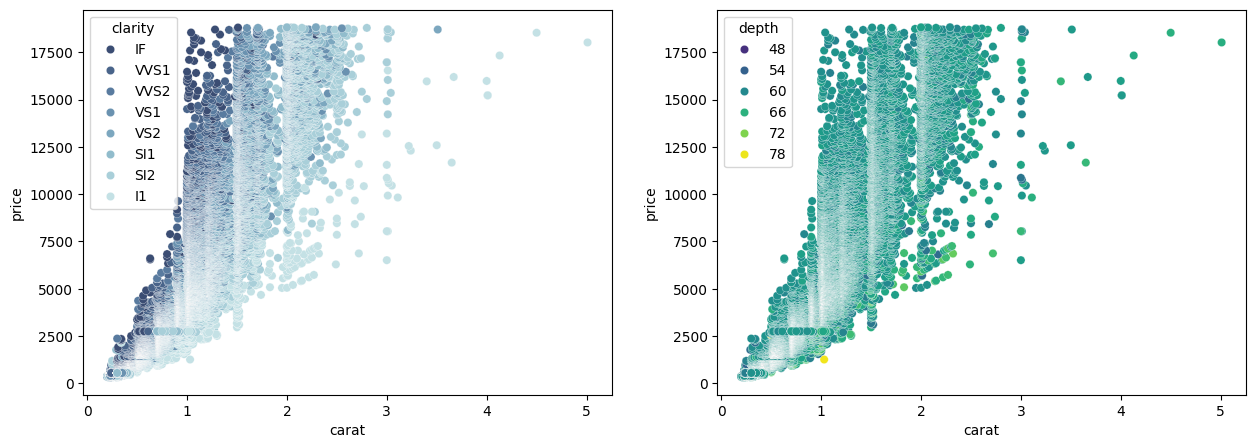

In [13]:
# 2번
# 2번의 경우, clarity와 depth의 관계를 동시에 확인할 수 없다는 점이 있었습니다.
# 따라서 이를 분리해 확인할 수 있도록 했습니다. 
# Depth의 경우 대부분의 값이 비슷했기 때문에 분리하는게 유의미했고, 60에 해당하는 색이 최상위 가격대를 가지고 있었다는 점을 확인할 수 있었습니다.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax1)


depth_ranking = [48, 54, 60, 66, 72, 78]

# 색상 맵 변경 및 saturation, lightness 조절
sns.scatterplot(x="carat",
                y="price",
                hue="depth",
                palette="viridis",
                hue_order=depth_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df)




clarity가 높을 수록 높은 가격에 분포하는 것 확인 가능, 추가로 depth는 대부분이 66~72에 분포하며 약 60 정도의 depth를 가지는 다이아몬드가 제일 가치가 높음

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


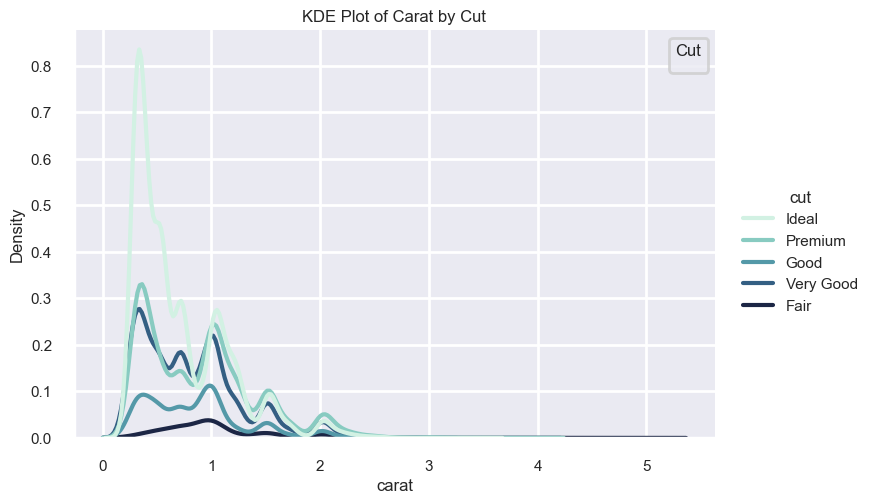

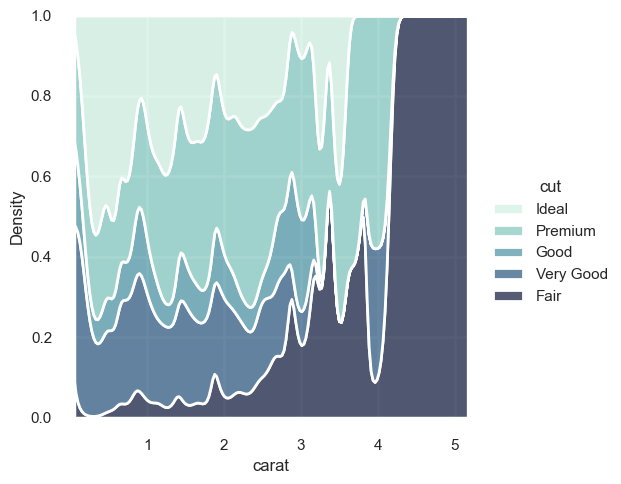

In [50]:
# 3번 KDE를 통한 시각화
# KDE - density plot은 1에 의해 한정되어 있었고, 하단 면적을 색칠해 함수 간 크기 비교가 어려웠기 때문에, 이를 선 형태로 분리했고, 전체 그래프가 다 보이도록 설정했습니다. 
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set_theme(
    context='poster',
    style='darkgrid',
    font='sans-serif',
    font_scale=.5,
    color_codes=True,
    rc=None, 
)

# KDE 플롯
sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    aspect=1.5,  # 높이와 가로비 설정
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
  # 각각의 히스토그램을 독립적으로 정규화
)

# 플롯에 제목 추가
plt.title("KDE Plot of Carat by Cut")

# 그리드 표시 여부 설정
plt.grid(True)

# 색상 팔레트 설명 추가
plt.legend(title="Cut")

# 그래프 표시
plt.show()

sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
    
)

# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.

1. #Q. 지역 별로 Product Line에 대한 선호가 있을 것이다. -> 가설이 맞다면 이를 바탕으로 상품 판매 계획 수정
2. Product_line, State, Sales.
3. IOWA, NEVADA같은 지역은 특히나 Beans보다 Leaves에 대한 선호가 높다. 그 외에도 뚜렷하게 차이나는 지역 별 선호도가 존재
4. 지역 별 상품 판매 계획을 달리 할 수 있다. NEVADA, IOWA 시그니처 티 라인을 만드는 등

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_1753/3994961881.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # x축 레이블 회전 설정


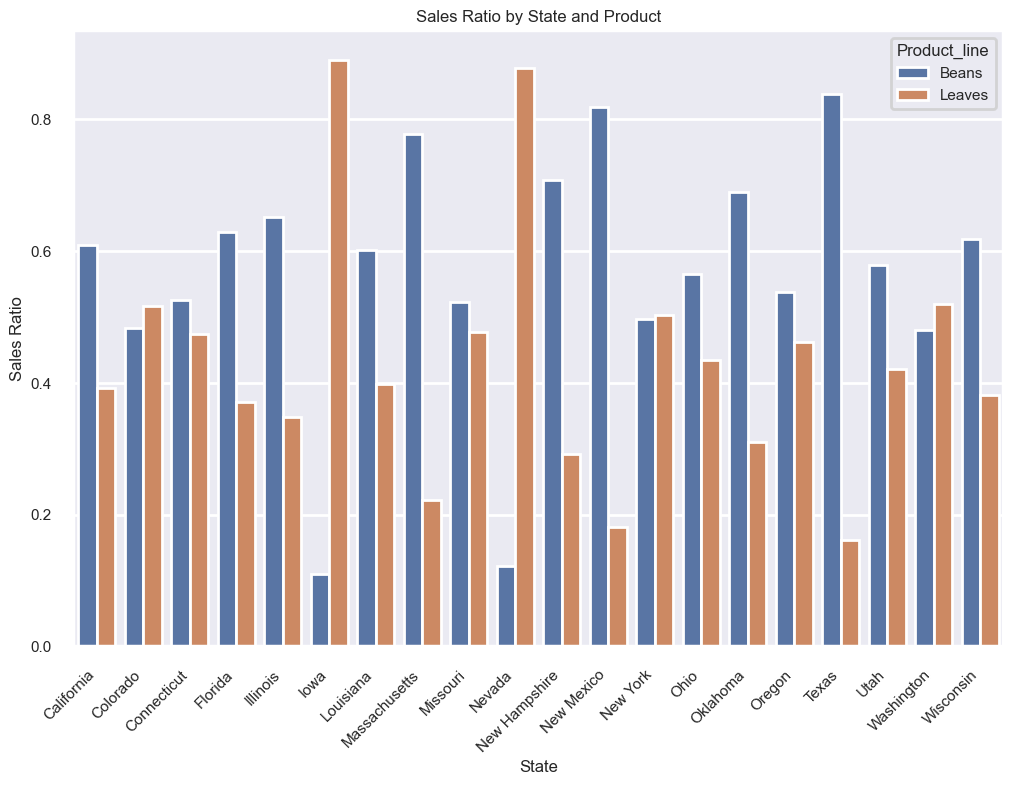

In [67]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.
df_3 = pd.read_csv('/Users/daniel/Downloads/Coffee_Chain_Sales .csv')
#df_3.head(10)
# EDA - Area code가 여러개 있나?
# df_3[df_3['Area Code']==303]
# State가 몇개 있지 -> 전부 다 있는 건 아님
# df_3['State'].unique()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 프레임에서 'Date' 열을 날짜 형식으로 변환
df_3['Date'] = pd.to_datetime(df_3['Date'])

# 각 주(State)의 총 판매량 계산
total_sales_by_state = df_3.groupby('State')['Sales'].sum()

# 각 제품의 판매량을 해당 주의 총 판매량으로 나누어 비율 계산
product_sales_ratio = df_3.groupby(['State', 'Product_line'])['Sales'].sum() / total_sales_by_state

# 비율을 데이터프레임으로 변환
product_sales_ratio_df = product_sales_ratio.reset_index(name='Sales_Ratio')

# 시각화
plt.figure(figsize=(12, 8))
# x축 레이블을 45도로 회전
ax = sns.barplot(x='State', y='Sales_Ratio', hue='Product_line', data=product_sales_ratio_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # x축 레이블 회전 설정
plt.title('Sales Ratio by State and Product')
plt.xlabel('State')
plt.ylabel('Sales Ratio')
plt.show()


